# Overhead

In [223]:
import math
from PIL import Image
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

In [125]:
MAP_DIRECTORY = "/media/host_data/lions/map/"

In [2]:
TEST_MAP_DIRECTORY = "/media/host_data/lions/test/map/"

In [196]:
tests = [
    {'file':'down_down_up.gif', 'lane1':'down', 'lane2':'down', 'lane3':'up', 'segs':['r','r','r','g','g','g','g','g']},
    {'file':'down_up_up.gif', 'lane1':'down', 'lane2':'up', 'lane3':'up', 'segs':['g','g','r','g','g','g','g','g']},
    {'file':'down_x_up.gif', 'lane1':'down', 'lane2':'x', 'lane3':'up', 'segs':['g','g','r','g','g','r','g','g']},
    {'file':'grey_seg8.gif', 'lane1':'down', 'lane2':'x', 'lane3':'up', 'segs':['g','g','g','g','g','g','g','grey']},
    {'file':'red_southbound.gif', 'lane1':'down', 'lane2':'down', 'lane3':'up', 'segs':['r','r','r','g','r','g','r','g']},
    {'file':'red_nb_causeway.gif', 'lane1':'down', 'lane2':'x', 'lane3':'up', 'segs':['g','r','r','g','g','r','g','r']},
]

# Lane Direction

## Reference Images

In [153]:
lane1_coords = [[115,130],[261,274]]
lane2_coords = [[131,143],[268,285]]
lane3_coords = [[145,157],[277,291]]

Go through the test images and extract the lane status sections.

In [114]:
img = Image.open(TEST_MAP_DIRECTORY + tests[0]['file'])
img = img.convert('RGB')
img_array = np.array(list(img.getdata())).reshape((img.size[1],img.size[0],3))
lane1_down_array = img_array[lane1_coords[1][0]:lane1_coords[1][1],lane1_coords[0][0]:lane1_coords[0][1]]
lane2_down_array = img_array[lane2_coords[1][0]:lane2_coords[1][1],lane2_coords[0][0]:lane2_coords[0][1]]
lane3_up_array = img_array[lane3_coords[1][0]:lane3_coords[1][1],lane3_coords[0][0]:lane3_coords[0][1]]
img = Image.open(TEST_MAP_DIRECTORY + tests[1]['file'])
img = img.convert('RGB')
img_array = np.array(list(img.getdata())).reshape((img.size[1],img.size[0],3))
lane2_up_array = img_array[lane2_coords[1][0]:lane2_coords[1][1],lane2_coords[0][0]:lane2_coords[0][1]]
img = Image.open(TEST_MAP_DIRECTORY + tests[2]['file'])
img = img.convert('RGB')
img_array = np.array(list(img.getdata())).reshape((img.size[1],img.size[0],3))
lane2_x_array = img_array[lane2_coords[1][0]:lane2_coords[1][1],lane2_coords[0][0]:lane2_coords[0][1]]

Visualize the images to maek sure we got it right.

In [120]:
Image.fromarray(np.uint8(lane1_down_array))

In [122]:
Image.fromarray(np.uint8(lane2_down_array))

In [123]:
Image.fromarray(np.uint8(lane2_up_array))

In [119]:
Image.fromarray(np.uint8(lane2_x_array))

Look at the differences just to make sure that they are nicely differentiable.

In [149]:
def show_dif(arr1, arr2):
    dif = arr1 - arr2
    abs_dif = np.abs(dif)
    max_abs_dif = abs_dif.max()
    scaled_abs_dif = (255.0 / max_abs_dif) * abs_dif
    return Image.fromarray(np.uint8(scaled_abs_dif))

In [150]:
show_dif(lane2_up_array, lane2_down_array)

In [151]:
show_dif(lane2_up_array, lane2_x_array)

In [154]:
show_dif(lane2_down_array, lane2_x_array)

## Confirm Exhaustive Set

Go through the 20,000 files that we have at this point and confirm that these reference images represent an exhaustive set. That is, there are no surprises in the files.

In [269]:
from os import listdir
from os.path import isfile, join
files = [ f for f in listdir(MAP_DIRECTORY) if isfile(join(MAP_DIRECTORY,f)) ]

In [126]:
# Given two arrays from the images, returns the largest difference between any two pixels in RBG space
def get_max_distance(array1, array2):
    dif = array1 - array2
    dif2 = np.power(dif,2)
    dif_t = dif2[:,:,0] + dif2[:,:,1] + dif2[:,:,2]
    dist = np.sqrt(dif_t)
    return dist.max()

In [131]:
d_l1d = []
d_l2d = []
d_l3u = []
d_l2u = []
d_l2x = []

for f in files:
    img = Image.open(MAP_DIRECTORY + f)
    img = img.convert('RGB')
    img_array = np.array(list(img.getdata())).reshape((img.size[1],img.size[0],3))
    img_lane1_array = img_array[lane1_coords[1][0]:lane1_coords[1][1],lane1_coords[0][0]:lane1_coords[0][1]]
    img_lane2_array = img_array[lane2_coords[1][0]:lane2_coords[1][1],lane2_coords[0][0]:lane2_coords[0][1]]
    img_lane3_array = img_array[lane3_coords[1][0]:lane3_coords[1][1],lane3_coords[0][0]:lane3_coords[0][1]]
    
    
    d_l1d.append((get_max_distance(img_lane1_array,lane1_down_array)))
    
    d_l2d.append((get_max_distance(img_lane2_array,lane2_down_array)))
    d_l2u.append((get_max_distance(img_lane2_array,lane2_up_array)))
    d_l2x.append((get_max_distance(img_lane2_array,lane2_x_array)))
    
    d_l3u.append((get_max_distance(img_lane3_array,lane3_up_array)))

<IPython.core.display.Javascript object>


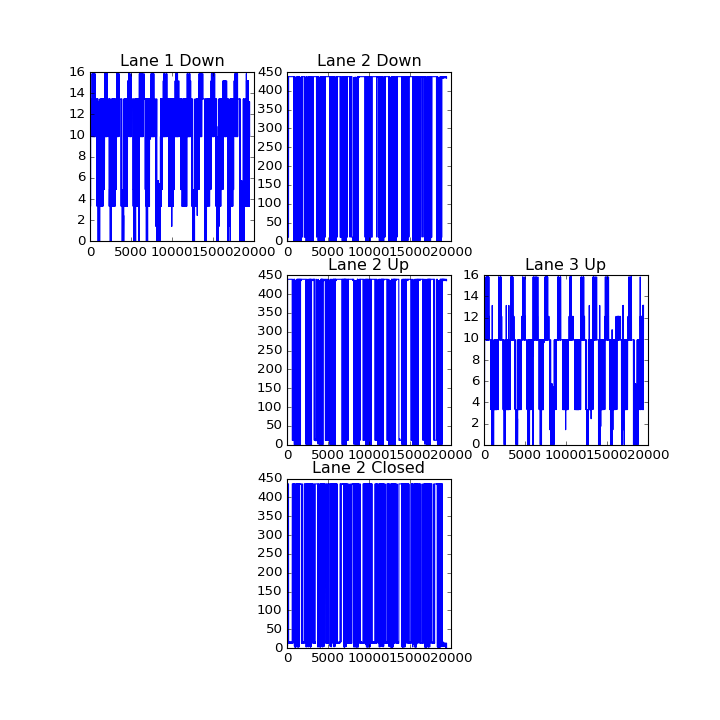

In [157]:
fig = plt.figure(figsize=(9,9))

ax = fig.add_subplot(331)
ax.plot(d_l1d)
plt.title('Lane 1 Down')

ax = fig.add_subplot(332)
ax.plot(d_l2d)
plt.title('Lane 2 Down')
ax = fig.add_subplot(335)
ax.plot(d_l2u)
plt.title('Lane 2 Up')
ax = fig.add_subplot(338)
ax.plot(d_l2x)
plt.title('Lane 2 Closed')

ax = fig.add_subplot(336)
ax.plot(d_l3u)
plt.title('Lane 3 Up')

<IPython.core.display.Javascript object>


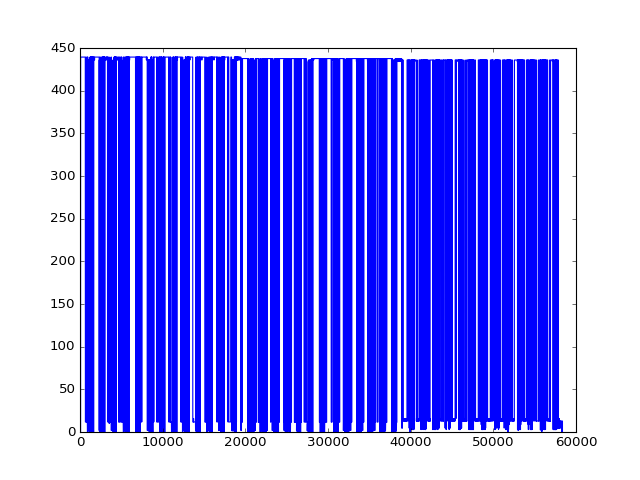

In [133]:
plt.figure()
plt.plot(d_l2u + d_l2d + d_l2x)

In [142]:
prop_l1d = sum(np.array(d_l1d) < 17) / len(d_l1d)
prop_l2u = sum(np.array(d_l2u) < 17) / len(d_l2u)
prop_l2d = sum(np.array(d_l2d) < 17) / len(d_l2d)
prop_l2x = sum(np.array(d_l2x) < 17) / len(d_l2x)
prop_l3u = sum(np.array(d_l3u) < 17) / len(d_l3u)

print(str(prop_l1d) + ' of lane 1 are down')
print(str(prop_l2u) + ' of lane 2 are up')
print(str(prop_l2d) + ' of lane 2 are down')
print(str(prop_l2x) + ' of lane 2 are x')
print(str(prop_l2u + prop_l2d + prop_l2x) + ' of lane 2 are any of up, down, or x')
print(str(prop_l3u) + ' of lane 3 are up')

1.0 of lane 1 are down
0.359701876124 of lane 2 are up
0.303263942431 of lane 2 are down
0.337034181444 of lane 2 are x
1.0 of lane 2 are any of up, down, or x
1.0 of lane 3 are up


We can consider it confirmed that the reference images we have are exhaustive.

# Detection Function

Comparing the refernece images to every single map image actually takes quite a lot of computing.
Let's get a function that does it based on only a few tests.
We can use the difference visualizations from before to find the most important points.

In [150]:
show_dif(lane2_up_array, lane2_down_array)

In [151]:
show_dif(lane2_up_array, lane2_x_array)

In [154]:
show_dif(lane2_down_array, lane2_x_array)

In [172]:
print('down')
print(lane2_down_array[4,4])
print('up')
print(lane2_up_array[4,4])
print('x')
print(lane2_x_array[4,4])

down
[1 1 1]
up
[237 240 233]
x
[211  64  64]


Well that point looks good.

In [171]:
print(tests[0]['lane2'])
print(Image.open(TEST_MAP_DIRECTORY + tests[0]['file']).convert('RGB').getpixel((lane2_coords[0][0] + 4, lane2_coords[1][0] + 4)))
print(tests[1]['lane2'])
print(Image.open(TEST_MAP_DIRECTORY + tests[1]['file']).convert('RGB').getpixel((lane2_coords[0][0] + 4, lane2_coords[1][0] + 4)))
print(tests[2]['lane2'])
print(Image.open(TEST_MAP_DIRECTORY + tests[2]['file']).convert('RGB').getpixel((lane2_coords[0][0] + 4, lane2_coords[1][0] + 4)))

down
(1, 1, 1)
up
(237, 240, 233)
x
(211, 64, 64)


In [174]:
print(lane2_coords[0][0] + 4)
print(lane2_coords[1][0] + 4)

135
272


In [181]:
def get_px_dist(px1, px2):
    d2r = math.pow(px1[0]-px2[0],2)
    d2g = math.pow(px1[1]-px2[1],2)
    d2b = math.pow(px1[2]-px2[2],2)
    return math.sqrt(d2r+d2g+d2b)

In [182]:
def get_lane2(img):
    px = img.getpixel((135,272))
    if get_px_dist(px,(1,1,1)) < 17:
        return 'down'
    elif get_px_dist(px,(237,240,233)) < 17:
        return 'up'
    elif get_px_dist(px,(211,64,54)) < 17:
        return 'x'
    else:
        return 'FAIL'

We have no evidence of Lane 1 ever being aything but down or Lane 3 being anything but up, so for now we'll just always return that until we find a test that fails.

In [187]:
print(lane1_coords[0][0] + 4)
print(lane1_coords[1][0] + 4)
print(Image.open(TEST_MAP_DIRECTORY + tests[0]['file']).convert('RGB').getpixel((lane1_coords[0][0] + 4, lane1_coords[1][0] + 4)))
print(lane3_coords[0][0] + 4)
print(lane3_coords[1][0] + 4)
print(Image.open(TEST_MAP_DIRECTORY + tests[0]['file']).convert('RGB').getpixel((lane3_coords[0][0] + 4, lane3_coords[1][0] + 4)))

119
265
(112, 114, 110)
149
281
(53, 62, 64)


In [188]:
def get_lane1(img):
    px = img.getpixel((119,265))
    if get_px_dist(px,(112,114,110)) > 17:
        return 'FAIL'
    else:
        return 'down'
    
def get_lane3(img):
    px = img.getpixel((149,281))
    if get_px_dist(px,(53,62,64)) > 17:
        return 'FAIL'
    else:
        return 'up'

In [189]:
for t in tests:
    img = Image.open(TEST_MAP_DIRECTORY + t['file'])
    img = img.convert('RGB')
    print(t['file'])
    print('Lane 1: ' + get_lane1(img) + ' ' + t['lane1'])   
    print('Lane 2: ' + get_lane2(img) + ' ' + t['lane2'])   
    print('Lane 3: ' + get_lane3(img) + ' ' + t['lane3'])   

down_down_up.gif
Lane 1: down down
Lane 2: down down
Lane 3: up up
down_up_up.gif
Lane 1: down down
Lane 2: up up
Lane 3: up up
down_x_up.gif
Lane 1: down down
Lane 2: x x
Lane 3: up up


# Congestion Segments

There are 8 segments in the image that get coloured red or green depending if they are currently congested. We will number them top to bottom, left to right. So Taylor Way is the first segment. Northbound at Lost Lagoon is the eight segment.

In [190]:
segment_coords = [
    (119, 104),
    (139,153),
    (139,184),
    (139,195),
    (82,278),
    (82,289),
    (74,389),
    (97,399),
]

In [201]:
for idx, sc in enumerate(segment_coords):
    print(sc)
    for t in tests:
        img = Image.open(TEST_MAP_DIRECTORY + t['file']).convert('RGB')
        print(t['segs'][idx] + ' ' + str(img.getpixel(sc)))
    print('')

(119, 104)
r (255, 0, 0)
g (47, 160, 71)
g (47, 160, 71)
g (47, 160, 71)
r (255, 0, 0)
g (47, 160, 71)

(139, 153)
r (255, 0, 0)
g (47, 160, 71)
g (47, 160, 71)
g (47, 160, 71)
r (255, 0, 0)
r (255, 0, 0)

(139, 184)
r (255, 0, 0)
r (255, 0, 0)
r (255, 0, 0)
g (47, 160, 71)
r (255, 0, 0)
r (255, 0, 0)

(139, 195)
g (47, 160, 71)
g (47, 160, 71)
g (47, 160, 71)
g (47, 160, 71)
g (47, 160, 71)
g (47, 160, 71)

(82, 278)
g (47, 160, 71)
g (47, 160, 71)
g (47, 160, 71)
g (47, 160, 71)
r (255, 0, 0)
g (47, 160, 71)

(82, 289)
g (47, 160, 71)
g (47, 160, 71)
r (255, 0, 0)
g (47, 160, 71)
g (47, 160, 71)
r (255, 0, 0)

(74, 389)
g (47, 160, 71)
g (47, 160, 71)
g (47, 160, 71)
g (47, 160, 71)
r (255, 0, 0)
g (47, 160, 71)

(97, 399)
g (47, 160, 71)
g (47, 160, 71)
g (47, 160, 71)
grey (152, 153, 151)
g (47, 160, 71)
r (255, 0, 0)



Yes, I can see that we do not yet have an example of red for segment 5.
Colours are verty reliable here.

In [209]:
def get_color(px):
    if get_px_dist(px,(255,0,0)) < 17:
        return 'r'
    elif get_px_dist(px,(47,160,71)) < 17:
        return 'g'
    elif get_px_dist(px,(152,153,151)) < 17:
        return 'grey'
    else:
        return 'FAIL'

In [207]:
def get_segs(img):
    segs = []
    for sc in segment_coords:
        segs.append(get_color(img.getpixel(sc)))
    return segs

# Putting it all together

In [210]:
for t in tests:
    img = Image.open(TEST_MAP_DIRECTORY + t['file'])
    img = img.convert('RGB')
    print(t['file'])
    print('Lane 1: ' + get_lane1(img) + ' ' + t['lane1'])   
    print('Lane 2: ' + get_lane2(img) + ' ' + t['lane2'])   
    print('Lane 3: ' + get_lane3(img) + ' ' + t['lane3'])
    print('Actual segs: ' + str(t['segs']))
    print('Detected   : ' + str(get_segs(img)))

down_down_up.gif
Lane 1: down down
Lane 2: down down
Lane 3: up up
Actual segs: ['r', 'r', 'r', 'g', 'g', 'g', 'g', 'g']
Detected   : ['r', 'r', 'r', 'g', 'g', 'g', 'g', 'g']
down_up_up.gif
Lane 1: down down
Lane 2: up up
Lane 3: up up
Actual segs: ['g', 'g', 'r', 'g', 'g', 'g', 'g', 'g']
Detected   : ['g', 'g', 'r', 'g', 'g', 'g', 'g', 'g']
down_x_up.gif
Lane 1: down down
Lane 2: x x
Lane 3: up up
Actual segs: ['g', 'g', 'r', 'g', 'g', 'r', 'g', 'g']
Detected   : ['g', 'g', 'r', 'g', 'g', 'r', 'g', 'g']
grey_seg8.gif
Lane 1: down down
Lane 2: x x
Lane 3: up up
Actual segs: ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'grey']
Detected   : ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'grey']
red_southbound.gif
Lane 1: down down
Lane 2: down down
Lane 3: up up
Actual segs: ['r', 'r', 'r', 'g', 'r', 'g', 'r', 'g']
Detected   : ['r', 'r', 'r', 'g', 'r', 'g', 'r', 'g']
red_nb_causeway.gif
Lane 1: down down
Lane 2: x x
Lane 3: up up
Actual segs: ['g', 'r', 'r', 'g', 'g', 'r', 'g', 'r']
Detected   : ['g', 'r',

In [214]:
def get_img_data(img):
    data = {}
    data['lane1'] = get_lane1(img)
    data['lane2'] = get_lane2(img)
    data['lane3'] = get_lane3(img)
    data['segs'] = get_segs(img)
    return data

In [218]:
for t in tests:
    img = Image.open(TEST_MAP_DIRECTORY + t['file']).convert('RGB')
    print(t['file'])
    
    data = get_img_data(img)
    for d in data:
        success = (data[d] == t[d])
        if success:
            success_text = 'pass'
        else:
            success_text = 'FAIL'
        print(success_text + ' ' + str(t[d]) + ' ' + str(data[d]))

down_down_up.gif
pass ['r', 'r', 'r', 'g', 'g', 'g', 'g', 'g'] ['r', 'r', 'r', 'g', 'g', 'g', 'g', 'g']
pass down down
pass down down
pass up up
down_up_up.gif
pass ['g', 'g', 'r', 'g', 'g', 'g', 'g', 'g'] ['g', 'g', 'r', 'g', 'g', 'g', 'g', 'g']
pass down down
pass up up
pass up up
down_x_up.gif
pass ['g', 'g', 'r', 'g', 'g', 'r', 'g', 'g'] ['g', 'g', 'r', 'g', 'g', 'r', 'g', 'g']
pass down down
pass x x
pass up up
grey_seg8.gif
pass ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'grey'] ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'grey']
pass down down
pass x x
pass up up
red_southbound.gif
pass ['r', 'r', 'r', 'g', 'r', 'g', 'r', 'g'] ['r', 'r', 'r', 'g', 'r', 'g', 'r', 'g']
pass down down
pass down down
pass up up
red_nb_causeway.gif
pass ['g', 'r', 'r', 'g', 'g', 'r', 'g', 'r'] ['g', 'r', 'r', 'g', 'g', 'r', 'g', 'r']
pass down down
pass x x
pass up up


In [271]:
lanes = [[],[],[]]
segs = [[],[],[],[],[],[],[],[]]
for f in files:
    img = Image.open(MAP_DIRECTORY + f).convert('RGB')
    data = get_img_data(img)
    lanes[0].append(data['lane1'])
    lanes[1].append(data['lane2'])
    lanes[2].append(data['lane3'])
    for idx, s in enumerate(data['segs']):
        segs[idx].append(s)

We need something to translate filenames to PT times.

In [236]:
import datetime
import pytz

In [252]:
def get_vancouver_datetime_from_filename(filename):
    t = datetime.datetime.strptime(filename[0:-4],"%Y%m%d%H%M%S")
    t = t.replace(tzinfo=pytz.timezone('UTC'))
    return t.astimezone(pytz.timezone('America/Vancouver'))

In [253]:
times = [get_vancouver_datetime_from_filename(f) for f in files]

In [347]:
df = pd.DataFrame({'time':times, 'lane1':lanes[0], 'lane2':lanes[1], 'lane3':lanes[2], 'seg1': segs[0], 'seg2': segs[1], 'seg3': segs[2], 'seg4': segs[3], 'seg5': segs[4], 'seg6': segs[5], 'seg7': segs[6], 'seg8': segs[7]})
df.set_index('time', inplace=True)

In [348]:
df.sort_index(inplace=True)

In [349]:
df.to_csv('/media/host_data/data.csv')

In [273]:
df['lane2_int'] = df.apply(lambda x: 1 if x['lane2'] == 'up' else -1 if x['lane2'] == 'down' else 0, axis=1)

<IPython.core.display.Javascript object>


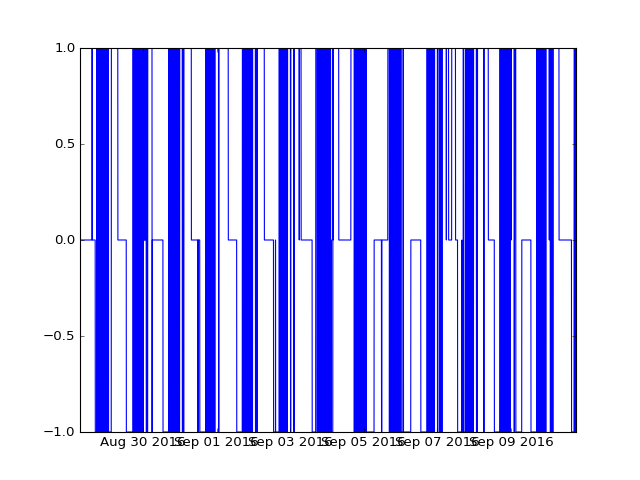

In [282]:
plt.plot(df['lane2_int'])

In [330]:
first_date = df.index.min().date()
first_datetime = datetime.datetime(first_date.year,first_date.month,first_date.day,tzinfo=pytz.timezone('America/Vancouver'))
last_date = df.index.max().date()
timedelta = last_date - first_date
n_days = timedelta.days

In [343]:
import calendar

<IPython.core.display.Javascript object>


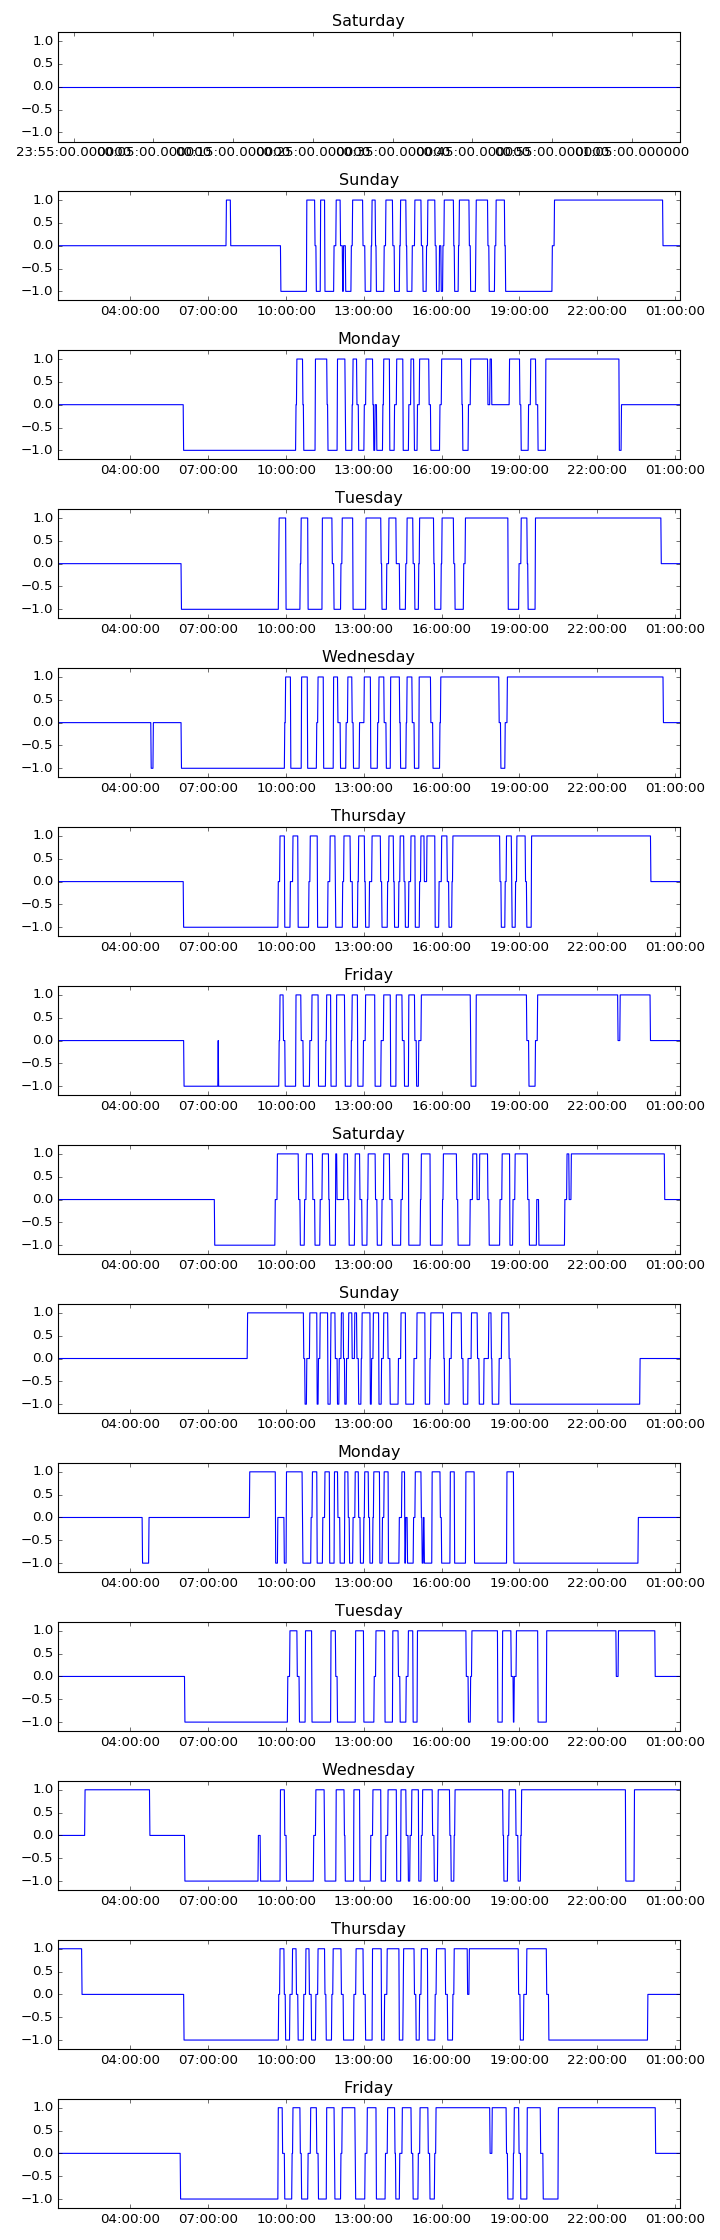

In [345]:
fig = plt.figure(figsize=(9,n_days*2))
for i in range(0,n_days):
    fig.add_subplot(n_days,1,i+1)
    before = first_datetime + datetime.timedelta(days=i)
    after = before + datetime.timedelta(days=1,seconds=-1)
    plt.plot(df.truncate(before=before,after=after)['lane2_int'])
    plt.gca().set_ylim([-1.2,1.2])
    ax = plt.gca()
    ax.xaxis_date(pytz.timezone('America/Vancouver'))
    ax.set_title(calendar.day_name[before.weekday()])
plt.tight_layout()

In [326]:
df.truncate(before=first_datetime + datetime.timedelta(days=1),after=first_datetime + datetime.timedelta(days=2))

,lane1,lane2,lane3,seg1,seg2,seg3,seg4,seg5,seg6,seg7,seg8,lane2_int
time,,,,,,,,,,,,
2016-08-28 01:12:00-07:00,down,x,up,g,g,r,g,g,g,g,g,0
2016-08-28 01:13:00-07:00,down,x,up,g,g,r,g,g,g,g,g,0
2016-08-28 01:14:01-07:00,down,x,up,g,g,r,g,g,g,g,g,0
2016-08-28 01:15:01-07:00,down,x,up,g,g,r,g,g,g,g,g,0
2016-08-28 01:16:00-07:00,down,x,up,g,g,g,g,g,g,g,g,0
2016-08-28 01:17:01-07:00,down,x,up,g,g,g,g,g,r,g,g,0
2016-08-28 01:18:00-07:00,down,x,up,g,g,g,g,g,r,g,g,0
2016-08-28 01:19:00-07:00,down,x,up,g,g,g,g,g,r,g,g,0
2016-08-28 01:20:01-07:00,down,x,up,g,g,g,g,g,r,g,g,0


In [295]:
df.truncate(before=datetime.date(2016,8,28),after=datetime.date(2016,8,29))

,lane1,lane2,lane3,seg1,seg2,seg3,seg4,seg5,seg6,seg7,seg8,lane2_int
time,,,,,,,,,,,,
2016-08-28 00:00:00-07:00,down,x,up,g,g,r,g,g,g,g,g,0
2016-08-28 00:01:00-07:00,down,x,up,g,g,r,g,g,g,g,g,0
2016-08-28 00:02:01-07:00,down,x,up,g,g,r,g,g,g,g,r,0
2016-08-28 00:03:01-07:00,down,x,up,g,g,r,g,g,g,g,r,0
2016-08-28 00:04:00-07:00,down,x,up,g,g,r,g,g,g,g,g,0
2016-08-28 00:05:01-07:00,down,x,up,g,g,r,g,g,r,g,g,0
2016-08-28 00:06:01-07:00,down,x,up,g,g,r,g,g,r,g,g,0
2016-08-28 00:07:00-07:00,down,x,up,g,g,r,g,g,r,g,g,0
2016-08-28 00:08:00-07:00,down,x,up,g,g,r,g,g,r,g,g,0
